This notebook explores a mock dataset of stars, constellations, galaxies, and users. It demonstrates how I approach data analysis: cleaning, descriptive stats, inferential tests, and visualization — even in a science-inspired domain. Unlike my other projects, this project is focused on **statistics and analytical depth**.

This notebook explores **descriptive statistics** for stars, constellations, and galaxies.  User behavior analysis is deferred to notebook 5.


First, import the necessary libraries and load the CSVs into dataframes.  Note that the CSVs that have already been cleaned up by `01_raw_data_cleanup.ipynb` are loaded.

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


SOURCE_FOLDER = "../data/cleaned"
sns.set_theme(style="whitegrid", palette="deep")

df_stars = pd.read_csv(f"{SOURCE_FOLDER}/stars.csv")
df_constellations = pd.read_csv(f"{SOURCE_FOLDER}/constellations.csv")
df_galaxies = pd.read_csv(f"{SOURCE_FOLDER}/galaxies.csv")

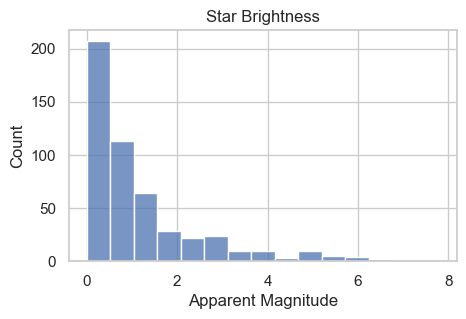

In [44]:
plt.figure(figsize=(5, 3))
sns.histplot(df_stars["apparent_magnitude"], bins=15)
plt.title("Star Brightness")
plt.xlabel("Apparent Magnitude")
plt.ylabel("Count")
plt.show()

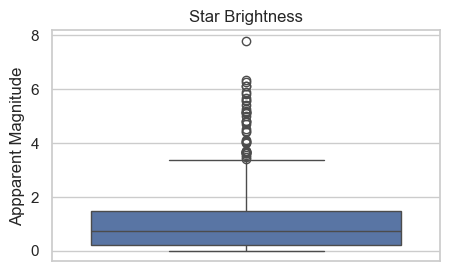

In [45]:
plt.figure(figsize=(5, 3))
sns.boxplot(y=df_stars["apparent_magnitude"])
plt.title("Star Brightness")
plt.ylabel("Appparent Magnitude")
plt.show()

The first chart above is a histogram for **Star Brightness**.  The second chart is a box plot also for **Star Brightess**.

Apparent magnitude is inverted: lower values = brighter stars.  Based on the charts, we see that most stars cluster between 0–2, meaning they are bright.  The **stars** dataset thus contains mostly bright stars.

*Note: I put both a histogram and a boxplot for brightness. The histogram gave me the big picture — where most stars sit on the brightness scale. The boxplot was a quick way to see outliers and the median in one glance. At first, I wasn’t sure I needed both, but I realized they actually complement each other. If I had to pick only one, I’d keep the histogram, but showing both gave me a chance to practice explaining distributions in two ways.*

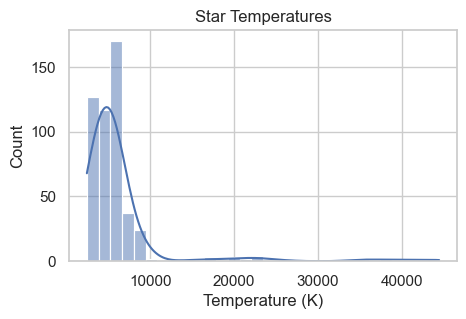

In [46]:
plt.figure(figsize=(5, 3))
sns.histplot(df_stars["temperature_k"], bins=30, kde=True)
plt.title("Star Temperatures")
plt.xlabel("Temperature (K)")
plt.ylabel("Count")
plt.show()

Above is a histogram for **Star Temperatures**.

Based on the histogram, we see that most stars have temperatures less than 10,000 K.  The histogram shows the actual counts, while the KDE line smoothens the distribution, making the overall pattern easier to see.  The **stars** dataset thus contains mostly cool stars.  

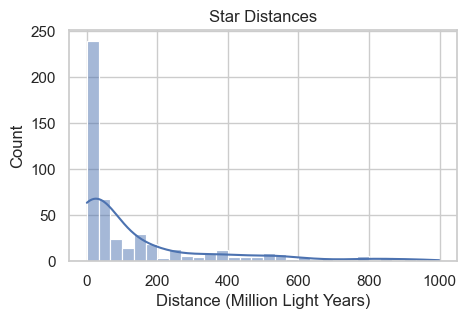

In [47]:
plt.figure(figsize=(5, 3))
sns.histplot(df_stars["distance_mly"], bins=30, kde=True)
plt.title("Star Distances")
plt.xlabel("Distance (Million Light Years)")
plt.ylabel("Count")
plt.show()

Above is a histogram for **Star Distances**.

Based on the histogram, we see that most stars are less than 200 million light years away.  Like in the preious chart, the histogram shows the actual counts, and the KDE line shows a smooth distribution.  The **stars** dataset thus contains mostly near stars.  

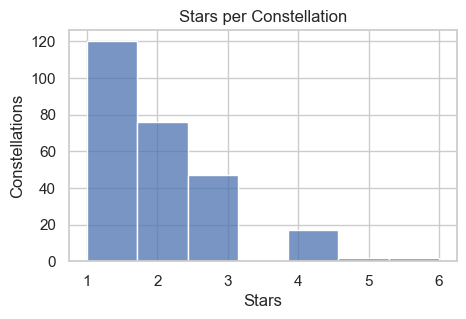

In [48]:
stars_per_const = df_stars.groupby("constellation_id").size().reset_index(name="count")
plt.figure(figsize=(5, 3))
sns.histplot(stars_per_const["count"], bins=7)
plt.title("Stars per Constellation")
plt.xlabel("Stars")
plt.ylabel("Constellations")
plt.show()

Above is a histogram for **Stars per Constellation**.  The **constellations** dataset thus has constellations that have at most 6 stars that exist in the **stars** dataset.

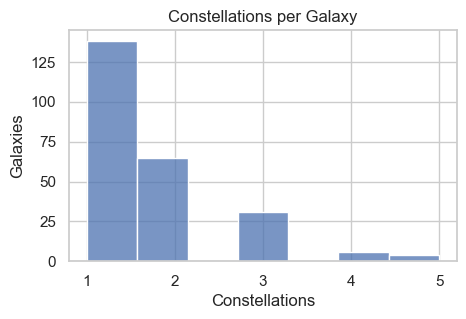

In [49]:
consts_per_gal = df_constellations.groupby("galaxy_id").size().reset_index(name="count")
plt.figure(figsize=(5, 3))
sns.histplot(consts_per_gal["count"], bins=7)
plt.title("Constellations per Galaxy")
plt.xlabel("Constellations")
plt.ylabel("Galaxies")
plt.show()

Above is a histogram for **Constellations per Galaxy**.  The **galaxies** dataset thus has galaxies that have at most 5 constellations that exist in the **constellations** dataset.

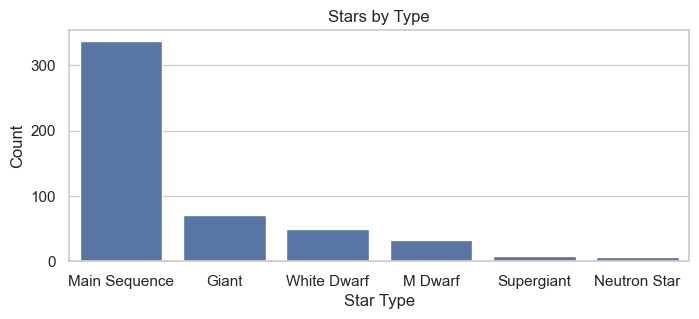

In [50]:
plt.figure(figsize=(8, 3))
sns.countplot(data=df_stars, x="star_type", order=df_stars["star_type"].value_counts().index)
plt.title("Stars by Type")
plt.xlabel("Star Type")
plt.ylabel("Count")
plt.show()

Above is a count plot of **Stars by Type**.

The **stars** dataset thus contains mostly *Main Sequence* stars.

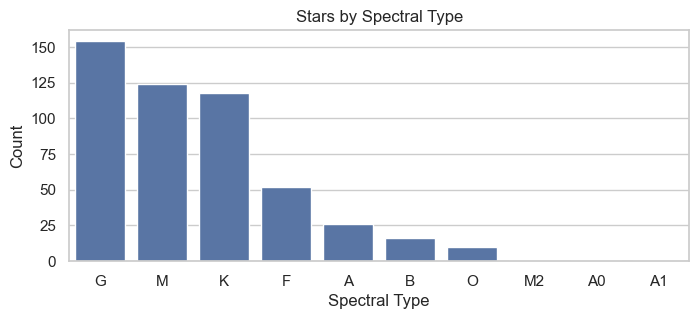

In [51]:
plt.figure(figsize=(8, 3))
sns.countplot(data=df_stars, x="spectral_type", order=df_stars["spectral_type"].value_counts().index)
plt.title("Stars by Spectral Type")
plt.xlabel("Spectral Type")
plt.ylabel("Count")
plt.show()

Above is a countplot for **Stars by Spectral Type**.

The **stars** dataset thus contains mostly *type-G*, *type-M* and *type-K* stars.

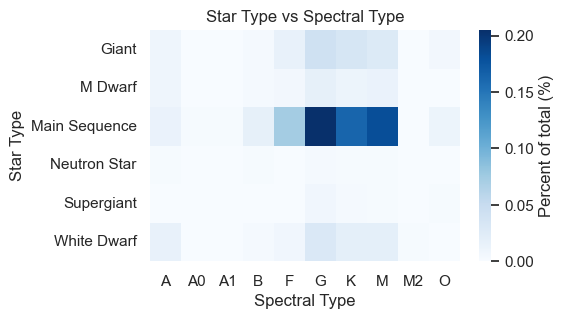

In [52]:
crosstab_counts = pd.crosstab(df_stars["star_type"], df_stars["spectral_type"], normalize="all")
plt.figure(figsize=(5, 3))
sns.heatmap(crosstab_counts, annot=False, cbar_kws={'label': 'Percent of total (%)'}, cmap="Blues")
plt.title("Star Type vs Spectral Type")
plt.ylabel("Star Type")
plt.xlabel("Spectral Type")
plt.show()

Above chart is a heatmap of **Star Type vs Spectral Type**.  We see from the heatmap that most of the *Main Sequence* stars are *Type G*.

*Note: This heatmap displays proportions only; in the notebook on **inferential stats** we revisit this map to display the actual values.*

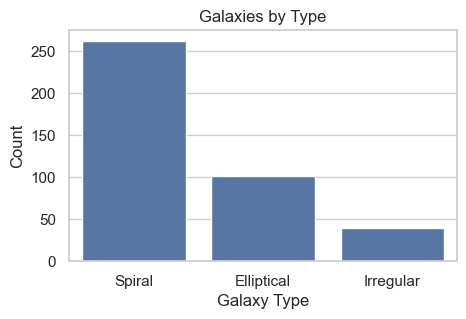

In [53]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df_galaxies, x="galaxy_type", order=df_galaxies["galaxy_type"].value_counts().index)
plt.title("Galaxies by Type")
plt.xlabel("Galaxy Type")
plt.ylabel("Count")
plt.show()

Above is a countplot for **Galaxies by Type**.

The **galaxies** dataset thus mostly contains *Spiral* glaxies.